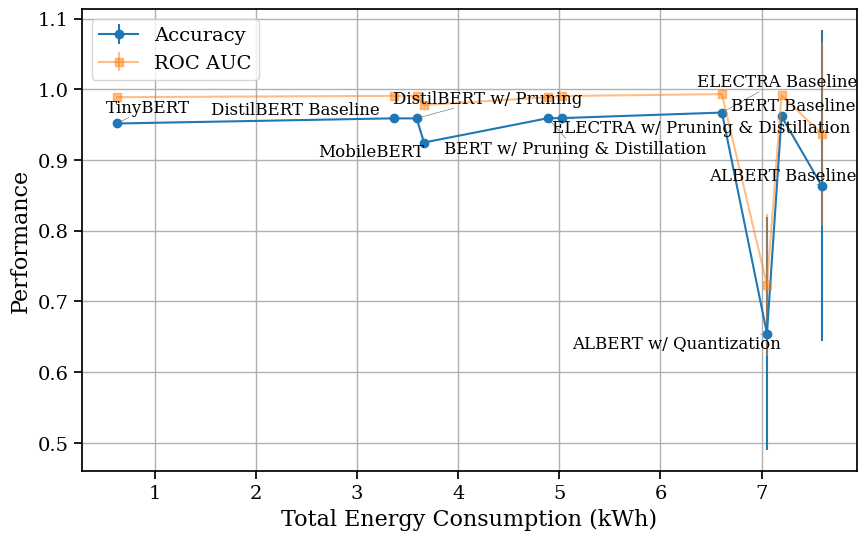

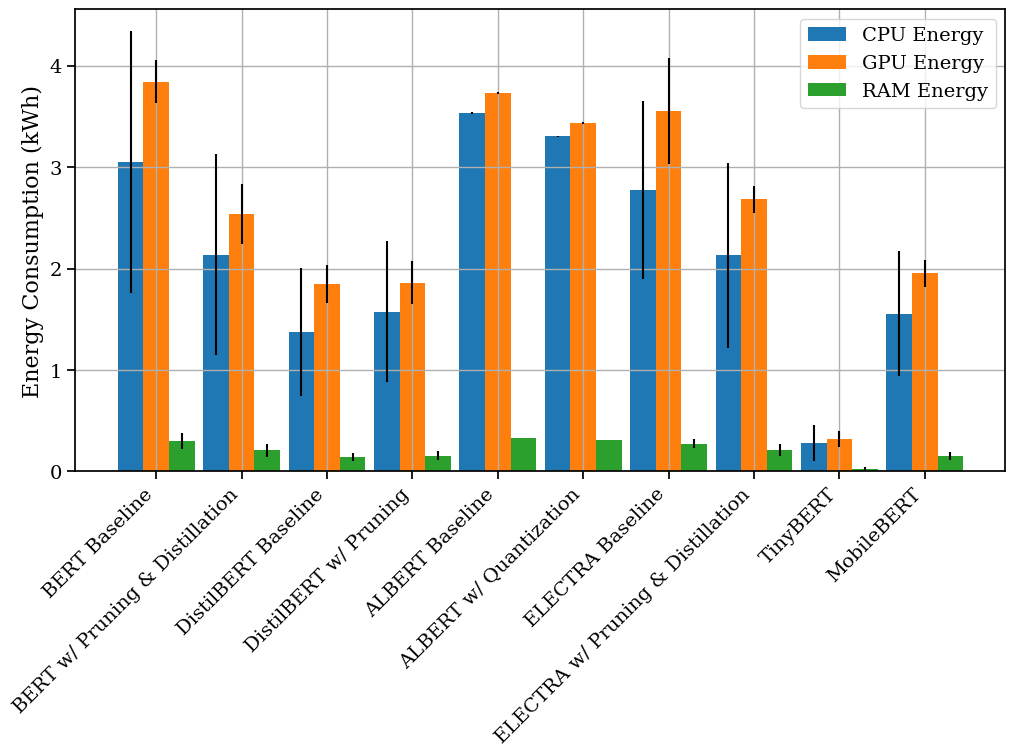

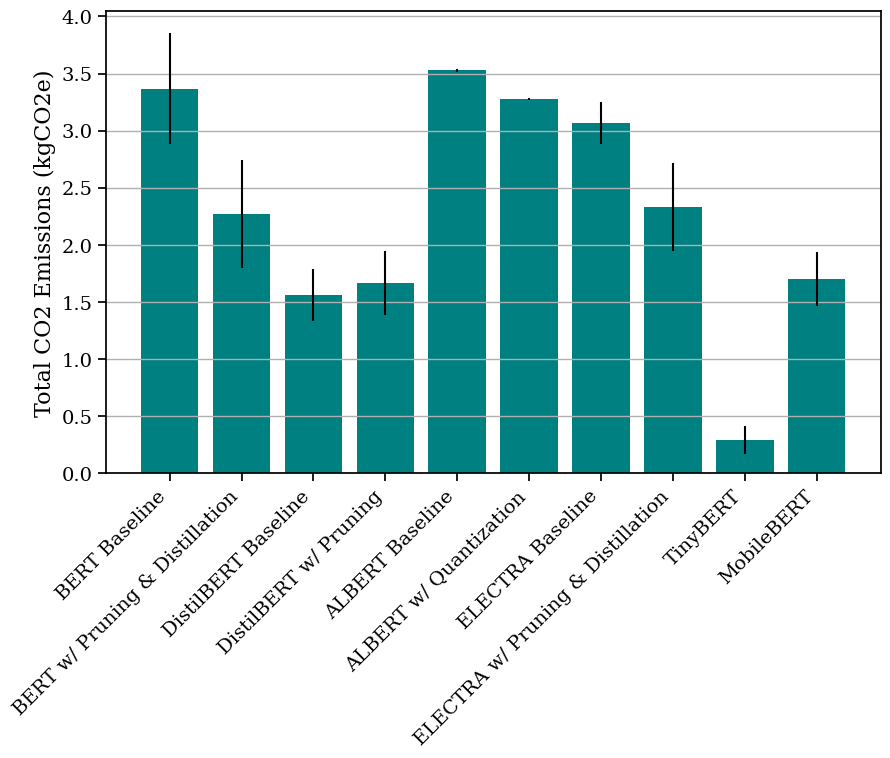

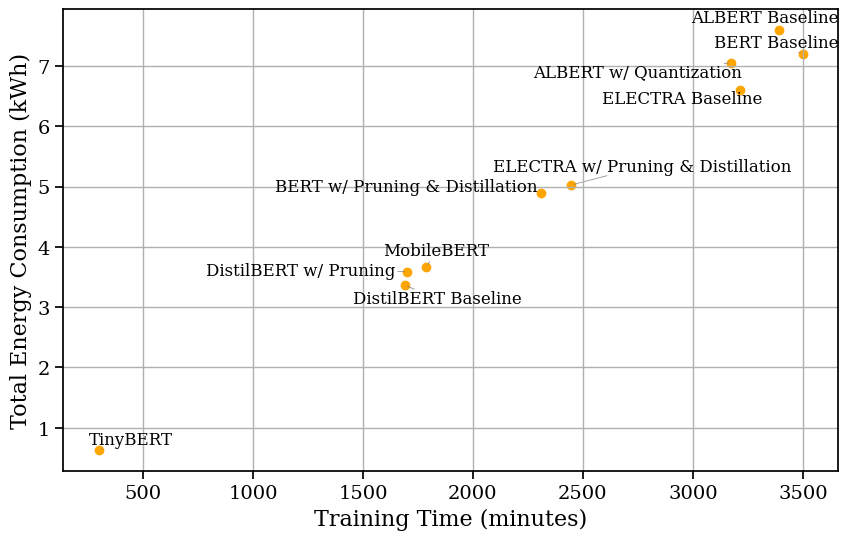

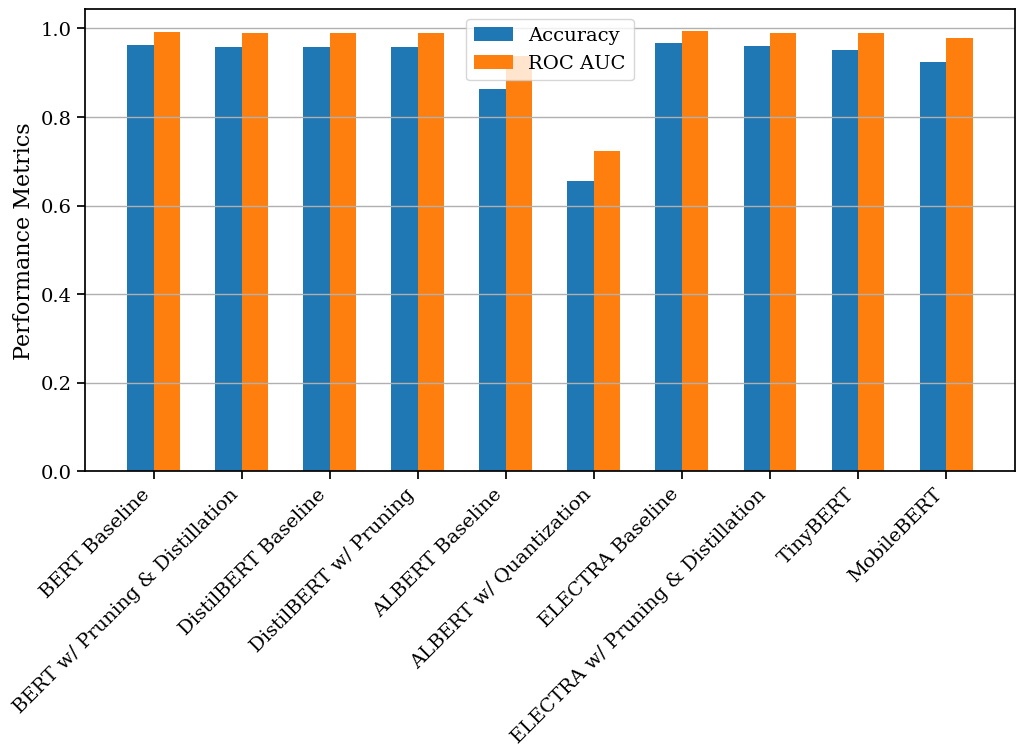

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from adjustText import adjust_text  # Auto-adjusts label positions to avoid overlap

# Set font and general style
plt.rcParams["font.family"] = "serif"  # Use Times New Roman or similar
plt.rcParams["axes.labelsize"] = 16  # Increase axis label font size
plt.rcParams["xtick.labelsize"] = 14  # Increase x-tick font size
plt.rcParams["ytick.labelsize"] = 14  # Increase y-tick font size
plt.rcParams["legend.fontsize"] = 14  # Increase legend font size
plt.rcParams["axes.titlesize"] = 18  # Increase title font size

# Data
models = [
    "BERT Baseline", "BERT w/ Pruning & Distillation", "DistilBERT Baseline", 
    "DistilBERT w/ Pruning", "ALBERT Baseline", "ALBERT w/ Quantization",
    "ELECTRA Baseline", "ELECTRA w/ Pruning & Distillation", "TinyBERT", "MobileBERT"
]

total_energy = [7.197, 4.887, 3.363666667, 3.589333333, 7.593151618, 7.0525, 6.6075, 5.02604, 0.6286666667, 3.6625]
total_emissions = [3.366, 2.27, 1.562666667, 1.667333333, 3.527768408, 3.2765, 3.0695, 2.33507, 0.2923333333, 1.7015]
cpu_energy = [3.05, 2.137666667, 1.375333333, 1.575666667, 3.531739552, 3.3055, 2.7775, 2.1325, 0.279, 1.5545]
gpu_energy = [3.8455, 2.538333333, 1.849666667, 1.861, 3.729884178, 3.4365, 3.555, 2.683, 0.3233333333, 1.9545]
ram_energy = [0.3015, 0.2076666667, 0.139, 0.153, 0.331533871, 0.3105, 0.2755, 0.2105, 0.027, 0.1535]
training_time = [3501.165, 2310.685667, 1691.023333, 1702.099333, 3390.906155, 3174.37, 3215.0815, 2447.571, 298.4453333, 1788.0555]
accuracy = [0.96154, 0.9590033333, 0.9588166667, 0.9587166667, 0.8635609276, 0.65445, 0.96699, 0.95917, 0.9515433333, 0.92461]
roc_auc = [0.991365, 0.9887133333, 0.9906333333, 0.99062, 0.9370836788, 0.723045, 0.99304, 0.99041, 0.9887566667, 0.97759]

# Error bars (computed as (upper - lower)/2)
total_energy_errors = [(8.36 - 6.04) / 2, (5.89 - 3.88) / 2, (3.85 - 2.88) / 2, (4.19 - 2.98) / 2, (7.62 - 7.57) / 2,
                       (7.07 - 7.03) / 2, (7.00 - 6.21) / 2, (5.86 - 4.20) / 2, (0.88 - 0.37) / 2, (4.18 - 3.14) / 2]
total_emissions_errors = [(3.85 - 2.88) / 2, (2.74 - 1.80) / 2, (1.79 - 1.34) / 2, (1.95 - 1.39) / 2, (3.54 - 3.52) / 2,
                          (3.29 - 3.27) / 2, (3.25 - 2.88) / 2, (2.72 - 1.95) / 2, (0.41 - 0.17) / 2, (1.94 - 1.46) / 2]
accuracy_errors = [(0.96 - 0.96) / 2, (0.96 - 0.96) / 2, (0.96 - 0.96) / 2, (0.96 - 0.96) / 2, (1.08 - 0.64) / 2,
                   (0.82 - 0.49) / 2, (0.97 - 0.97) / 2, (0.96 - 0.96) / 2, (0.95 - 0.95) / 2, (0.93 - 0.92) / 2]
roc_auc_errors = [(0.99 - 0.99) / 2, (0.99 - 0.99) / 2, (0.99 - 0.99) / 2, (0.99 - 0.99) / 2, (1.07 - 0.81) / 2,
                  (0.82 - 0.62) / 2, (0.99 - 0.99) / 2, (0.99 - 0.99) / 2, (0.99 - 0.99) / 2, (0.98 - 0.98) / 2]
cpu_energy_errors = [(4.34 - 1.76) / 2, (3.13 - 1.15) / 2, (2.01 - 0.74) / 2, (2.27 - 0.88) / 2, (3.54 - 3.52) / 2,
                     (3.31 - 3.30) / 2, (3.65 - 1.90) / 2, (3.04 - 1.22) / 2, (0.46 - 0.10) / 2, (2.17 - 0.94) / 2]
gpu_energy_errors = [(4.06 - 3.64) / 2, (2.83 - 2.24) / 2, (2.04 - 1.66) / 2, (2.07 - 1.65) / 2, (3.74 - 3.72) / 2,
                     (3.45 - 3.43) / 2, (4.08 - 3.03) / 2, (2.82 - 2.55) / 2, (0.40 - 0.24) / 2, (2.09 - 1.82) / 2]
ram_energy_errors = [(0.38 - 0.22) / 2, (0.27 - 0.14) / 2, (0.18 - 0.10) / 2, (0.20 - 0.11) / 2, (0.33 - 0.33) / 2,
                     (0.31 - 0.31) / 2, (0.32 - 0.23) / 2, (0.27 - 0.15) / 2, (0.04 - 0.01) / 2, (0.19 - 0.11) / 2]

# Sort by total energy for first graph
sorted_indices = np.argsort(total_energy)
temp_total_energy = np.array(total_energy)[sorted_indices]
temp_accuracy = np.array(accuracy)[sorted_indices]
temp_models = np.array(models)[sorted_indices]

# 1. Energy Consumption vs. Performance Trade-offs (Accuracy Only)
plt.figure(figsize=(10, 6))
plt.errorbar(temp_total_energy, temp_accuracy, yerr=np.array(accuracy_errors)[sorted_indices], fmt='o-', label='Accuracy')
plt.errorbar(temp_total_energy, np.array(roc_auc)[sorted_indices], yerr=np.array(roc_auc_errors)[sorted_indices], fmt='s-', label='ROC AUC', alpha=0.5)  # Keep ROC AUC but don't label it

# Annotate Accuracy points and auto-adjust labels
texts = [plt.text(temp_total_energy[i], temp_accuracy[i], temp_models[i], ha='center', fontsize=12) for i in range(len(temp_models))]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xlabel('Total Energy Consumption (kWh)')
plt.ylabel('Performance')
plt.legend()
plt.grid()
plt.show()

# 2. Total Energy Consumption by Component
width = 0.3
x = np.arange(len(models))
plt.figure(figsize=(12, 6))
plt.bar(x - width, cpu_energy, width, label='CPU Energy', yerr=cpu_energy_errors)
plt.bar(x, gpu_energy, width, label='GPU Energy', yerr=gpu_energy_errors)
plt.bar(x + width, ram_energy, width, label='RAM Energy', yerr=ram_energy_errors)
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()

# 3. Carbon Emissions by Model
plt.figure(figsize=(10, 6))
plt.bar(models, total_emissions, color='teal', yerr=total_emissions_errors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total CO2 Emissions (kgCO2e)')
plt.grid(axis='y')
plt.show()

# 4. Training Time vs. Energy Consumption (Auto-adjust labels)
plt.figure(figsize=(10, 6))
plt.scatter(training_time, total_energy, color='orange')

# Annotate Training Time points and auto-adjust labels
texts = [plt.text(training_time[i], total_energy[i], models[i], ha='center', fontsize=12) for i in range(len(models))]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xlabel('Training Time (minutes)')
plt.ylabel('Total Energy Consumption (kWh)')
plt.grid()
plt.show()

# 5. Performance Metrics Across Models (Only Accuracy & ROC AUC)
metrics = ['Accuracy', 'ROC AUC']
data = np.array([accuracy, roc_auc])
x = np.arange(len(models))
width = 0.3  # Adjust width for better spacing

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width / 2, data[0], width, label='Accuracy')
ax.bar(x + width / 2, data[1], width, label='ROC AUC')

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Performance Metrics')
ax.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set font and general style
plt.rcParams["font.family"] = "serif"  # Use Times New Roman or similar
sns.set_context("notebook", font_scale=1.4)  # General font scale for other elements

# Updated Confusion Matrices
confusion_matrices = {
    "BERT Baseline": np.array([[192545, 7455], [7948, 192052]]),
    "BERT w/ Pruning & Distillation": np.array([[192364, 7636], [8636, 191364]]),
    "DistilBERT w/ Pruning": np.array([[191905, 8095], [8319, 191681]]),
    "ALBERT w/ PTQ": np.array([[191672, 8328], [8128, 191872]]),
    "ELECTRA w/ Pruning & Distillation": np.array([[192203, 7797], [8522, 191478]]),
    "DistilBERT": np.array([[192039, 7961], [8417, 191583]]),
    "ALBERT": np.array([[190446, 9554], [9575, 190425]]),
    "ELECTRA": np.array([[193504, 6496], [6754, 193246]]),
    "TinyBERT": np.array([[190285, 9715], [9720, 190280]]),
    "MobileBERT": np.array([[185598, 14402], [16282, 183718]])
}

# Function to plot confusion matrix
def plot_confusion_matrix(matrix, model_name):
    plt.figure(figsize=(6, 4))  # Keep figure size reasonable
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
                annot_kws={"size": 30})  # Increase number size inside heatmap drastically
    plt.xlabel('Predicted Label', fontsize=18)
    plt.ylabel('True Label', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    print(model_name)
    plt.show()

# Plot each confusion matrix
for model, matrix in confusion_matrices.items():
    plot_confusion_matrix(matrix, model)


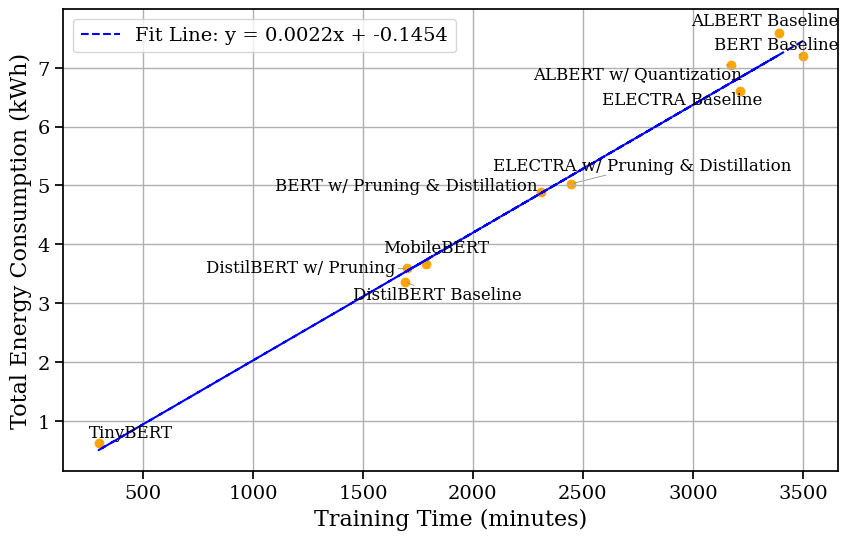

Fit Line Equation: y = 0.0022x + -0.1454
Correlation Coefficient: 0.9952


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Automatically adjusts labels

# Set font and general style
plt.rcParams["font.family"] = "serif"  # Use Times New Roman or similar
plt.rcParams["axes.labelsize"] = 16  # Increase axis label font size
plt.rcParams["xtick.labelsize"] = 14  # Increase x-tick font size
plt.rcParams["ytick.labelsize"] = 14  # Increase y-tick font size
plt.rcParams["legend.fontsize"] = 14  # Increase legend font size
plt.rcParams["axes.titlesize"] = 18  # Increase title font size

# Updated data
models = [
    "BERT Baseline", "BERT w/ Pruning & Distillation", "DistilBERT Baseline", 
    "DistilBERT w/ Pruning", "ALBERT Baseline", "ALBERT w/ Quantization",
    "ELECTRA Baseline", "ELECTRA w/ Pruning & Distillation", "TinyBERT", "MobileBERT"
]

total_energy = [7.197, 4.887, 3.363666667, 3.589333333, 7.593151618, 7.0525, 6.6075, 5.02604, 0.6286666667, 3.6625]
total_emissions = [3.366, 2.27, 1.562666667, 1.667333333, 3.527768408, 3.2765, 3.0695, 2.33507, 0.2923333333, 1.7015]
cpu_energy = [3.05, 2.137666667, 1.375333333, 1.575666667, 3.531739552, 3.3055, 2.7775, 2.1325, 0.279, 1.5545]
gpu_energy = [3.8455, 2.538333333, 1.849666667, 1.861, 3.729884178, 3.4365, 3.555, 2.683, 0.3233333333, 1.9545]
ram_energy = [0.3015, 0.2076666667, 0.139, 0.153, 0.331533871, 0.3105, 0.2755, 0.2105, 0.027, 0.1535]
training_time = [3501.165, 2310.685667, 1691.023333, 1702.099333, 3390.906155, 3174.37, 3215.0815, 2447.571, 298.4453333, 1788.0555]
accuracy = [0.96154, 0.9590033333, 0.9588166667, 0.9587166667, 0.8635609276, 0.65445, 0.96699, 0.95917, 0.9515433333, 0.92461]
roc_auc = [0.991365, 0.9887133333, 0.9906333333, 0.99062, 0.9370836788, 0.723045, 0.99304, 0.99041, 0.9887566667, 0.97759]



# Scatter plot with annotations
plt.figure(figsize=(10, 6))
plt.scatter(training_time, total_energy, color='orange')

# Add text labels and adjust automatically
texts = [plt.text(training_time[i], total_energy[i], models[i], ha='center', fontsize=12) for i in range(len(models))]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Fit a line to the data
coefficients = np.polyfit(training_time, total_energy, 1)
poly = np.poly1d(coefficients)
plt.plot(training_time, poly(training_time), color='blue', linestyle='--', label=f'Fit Line: y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}')

# Calculate correlation coefficient
correlation = np.corrcoef(training_time, total_energy)[0, 1]

# Plot labels and grid
plt.xlabel('Training Time (minutes)', fontsize=16)
plt.ylabel('Total Energy Consumption (kWh)', fontsize=16)
plt.grid()
plt.legend()
plt.show()

# Print fit line equation and correlation coefficient
print(f"Fit Line Equation: y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}")
print(f"Correlation Coefficient: {correlation:.4f}")
